# Day 5 - Gradient descent for simple linear regression

Extending code from day 3

caution:  this dataset has very few points, so local gradient estimation
using partial gradients in each direction (B0, B1)
has very little gradient to descend on.  

This will make it slow and highly dependent on your starting beta.  
Normally there are other much-better numerical techniques to deal with this...  
Dont use this local gradient descent code on real problems - there are better solutions!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Code to set up the matrix and make initial guess for Betas


For this exercise we will generate 20 datapoints containing student pretest (aptitute test) scores and their corresponding final exam scores using a basis linear function with added gaussian noise

(no student code required)

In [ ]:
#code to load your matrix here

np.random.seed(42)
pretest_scores = np.random.uniform(low=25, high=95, size=20).astype(int)
noise = 8*np.random.randn(1,len(pretest_scores))
final_exam_scores = (20+0.7*pretest_scores+noise   ).astype(int)
final_exam_scores[final_exam_scores>100]=100
final_exam_scores[final_exam_scores<0]=100
y=final_exam_scores.T

#build the design matrix X
X = np.vstack((np.ones(len(pretest_scores)),pretest_scores)).T                         

## Helper Functions and Utilities

(no student code required)

In [3]:
#function to generate line points for plotting
def computeline(intercept,slope,start_x,end_x):
    points_x=[start_x,end_x]
    points_y=[intercept,intercept+slope*end_x]
    return points_x, points_y

#function to plot regression lines through the data
def plot_regression_results(X, y, t, ythat, beta0,beta1, show=True, newfig = True, alpha = 1.0):
    if newfig:
        fig = plt.figure()  #else just keep using current axis
    plt.axis([0.,100.,0.,100.])
    #plt.axis([-1.,1.,-1.,1.])
    #add the points in black
    plt.scatter(X[:,1],y,c='k',marker='x')
    #add the predicted final exam score for Aptitude test = 80
    plt.scatter(t[0,1],ythat,c='g',marker='o',alpha=alpha)
    #add the student line in blue
    points_x,points_y = computeline(beta0,beta1,0,100)
    plt.plot(points_x,points_y,c='r',alpha=alpha)
    plt.title('Simple Regression')
    plt.ylabel('Final Exam Score')
    plt.xlabel('Aptitude test score')
    #plt.axis('equal')
    plt.grid(True)
    if show: plt.show()


## STEP 1: STUDENT CODE for the updating Beta to search for the best coefficients
Complete the code stub below to compute and return the gradient of the cost (error=MSE) surface in the immediate vicinity of the current values of the coefficients

An easy way to compute the local gradient is:

For theta in this linear regression model, the set of parameters includes (`beta0`, `beta1`), but you should write the code such that it could work for any number of coefficients (not just 2): 

* compute the errors for the current model parameters on the dataset X
* use these errors to determine the gradient of the error with respect to theta. 

After computing these, return the gradients 

Hint:  See HOML Chatper 4, page 142-144

Hint: the signs of the gradients should be such that ADDING a small amount of the gradient to beta would yield better (lower) RSS when recomputing RSS on the updated betas.   If you find that the instructor-provided gradient descent code that runs later in this notebook leads to worse RSS as the iterations progress, you might have a sign error in your gradient computations.

In [4]:
def compute_gradients(X,y,theta):
    '''
    Given the training data X (should have shape [obsCount, featureCount+1])
    and the current estimate for theta ( in the shape of [featureCount+1, 1]),
    and the correct values for each observation (shape = [obsCount,1])
    compute the gradients in each dimension of beta
    Returns gradients (shape = [featureCount+1,1] )
    '''
    
    
    #STUDENT CODE HERE 
    #using calculus (partial derivatives), compute the error gradients (slope of the error surface with respect to the theta values)
    #-----------------------------------------------------------
    gradients = None  #replace with code to compute the gradients
    
    #--------------------------
    #END STUDENT CODE
    
    assert gradients.shape==(X.shape[1],1) , "wrong gradient shape returned from compute_gradients"

    
    return gradients
    


## STEP 2:  STUDENT CODE for Guessing the starting Beta coefficients 

This regression activity can yield different results depending on the starting point of the beta guess.
one that works well for demonstrating the gradient descent process is one in which the starting conditions are far away from a good line.  For example:

`
 beta0 = 100.0
 beta1 = -2.0
`

In [5]:
#beta initial guess here.  Note that later you will find this using gradient descent
#beta = np.array([[26.768,0.644]]).T    #guess the best betas (2 x 1 array)  

#STUDENT CODE HERE.... GUESS YOUR BETA VALUES FOR Beta0 and Beta1
#suggestion:  make the beta guess bad
#--------------
beta0 = 100.0
beta1 = -2.0
#------------
#END STUDENT CODE

## Next, we compute the error when this beta is chosen, and we make predictions on the test point (80.0)

(no student code required)

Beta 
 [[100.]
 [ -2.]] 

Design Matrix X 
 [[ 1. 41.]
 [ 1. 90.]
 [ 1. 72.]
 [ 1. 60.]
 [ 1. 23.]
 [ 1. 23.]
 [ 1. 14.]
 [ 1. 83.]
 [ 1. 61.]
 [ 1. 70.]
 [ 1. 11.]
 [ 1. 92.]
 [ 1. 80.]
 [ 1. 28.]
 [ 1. 25.]
 [ 1. 25.]
 [ 1. 35.]
 [ 1. 54.]
 [ 1. 46.]
 [ 1. 34.]] 

yhat 
 [[ 18.]
 [-80.]
 [-44.]
 [-20.]
 [ 54.]
 [ 54.]
 [ 72.]
 [-66.]
 [-22.]
 [-40.]
 [ 78.]
 [-84.]
 [-60.]
 [ 44.]
 [ 50.]
 [ 50.]
 [ 30.]
 [ -8.]
 [  8.]
 [ 32.]] 

ydif (prediction errors) 
 [[ -26.]
 [-164.]
 [-110.]
 [ -76.]
 [  13.]
 [  19.]
 [  42.]
 [-138.]
 [ -82.]
 [-109.]
 [  55.]
 [-169.]
 [-133.]
 [   6.]
 [  15.]
 [   6.]
 [ -14.]
 [ -61.]
 [ -47.]
 [  -6.]] 


RSS:  [[141125.]] 

MSE:  [[7056.25]] 

RMSE:  [[84.00148808]] 

Prediction at Aptitude 80 [[-60.]] 



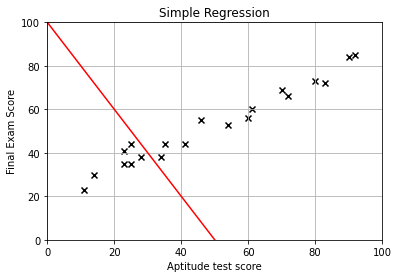

In [6]:
beta = np.array([[beta0,beta1]]).T      

#print the Betas and X's
print('Beta','\n', beta, '\n')
print('Design Matrix X', '\n', X, '\n')

#estimate yhat for all datapoints
yhat = np.dot(X,beta)

print('yhat','\n',  yhat,'\n')

#find the difference betwen predicted and truth 
ydiff = yhat-y
print('ydif (prediction errors)', '\n',ydiff, '\n')

#compute RSS
rss = np.dot(ydiff.T,ydiff)
#compute MSE
mse = rss/len(ydiff)
#compute RMSE
rmse =  np.sqrt(mse)
print()
print('RSS: ', rss, '\n')
print('MSE: ', mse, '\n')
print('RMSE: ',rmse, '\n')

#make prediction on aptitude test score of 80
t = np.array([[1, 80]])
ythat = np.dot(t,beta)
print('Prediction at Aptitude 80', ythat, '\n')
plot_regression_results(X, y, t, ythat, beta0, beta1)

## Next we use gradient descent to find good values for the coefficients  

(no student code required)

Initial beta linear regression plot


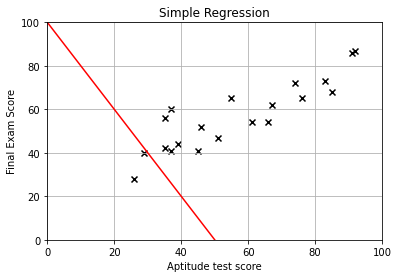

Starting beta search
*** Iteration  2500  improvement 1.1722966855741106  updatedRSS:  13086.528249621504 
  B0:  90.92207044321388  B1:  -0.45157012929098367 



*** Iteration  5000  improvement 0.9195589325536275  updatedRSS:  10484.608230702011 
  B0:  82.86266088312082  B1:  -0.32624417470926 



*** Iteration  7500  improvement 0.7213094098515285  updatedRSS:  8443.641277003433 
  B0:  75.72469872316896  B1:  -0.215246971403729 



*** Iteration  10000  improvement 0.5658008924910973  updatedRSS:  6842.690411565338 
  B0:  69.40283315510132  B1:  -0.11694028638569401 



*** Iteration  12500  improvement 0.44381876289480715  updatedRSS:  5586.891698655165 
  B0:  63.803758326020564  B1:  -0.02987318891448122 



*** Iteration  15000  improvement 0.34813500104428385  updatedRSS:  4601.833105420123 
  B0:  58.84483621606676  B1:  0.04723936411963958 



*** Iteration  17500  improvement 0.2730798899988258  updatedRSS:  3829.145235835123 
  B0:  54.45287696507303  B1:  0.115535494439

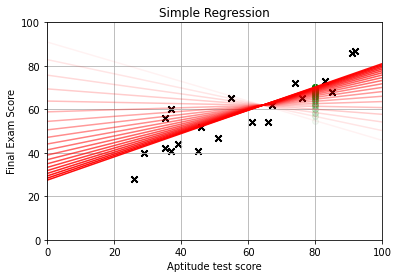

Done
Final Results


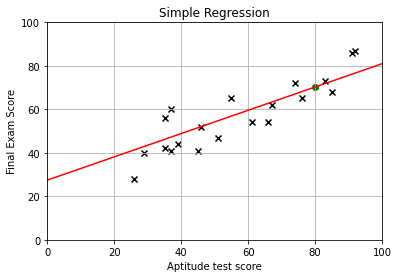

*** Iteration  50000  updatedRSS:  1137.4671496878564 
  B0:  27.449869015196214  B1:  0.5354394244557686 





In [ ]:
#Iteratively find best betas using gradient descent

#setup the search

convergenceThreshold = 0.0000001  #If theta changes less than this amount, finish the search
improvement = 99999999.0  #start with an unreasonbly high improvement

eta = 0.0002  #learning rate
iteration_count = 0
max_iterations=50000
done = False


t = np.array([[1, 80]])

comparisonBeta = np.array([[0],[0]])  #placeholder for comparing whether to plot new graphs or not

print("Initial beta linear regression plot")

plot_regression_results(X, y, t, ythat, beta0,beta1)
ythat = np.dot(t,beta)


print("Starting beta search")

theta=beta  # we will optimize theta parameters which will be initialized to beta
alpha = 0.0
while not done and iteration_count < max_iterations:
    #capture current rss value
    iteration_count = iteration_count+1

    yhatold = np.dot(X,theta)
    oldRss = np.dot((yhatold-y).T , (yhatold-y))
    
    #call the student-written code to find the gradient of the cost surface
    #at the current coefficient values (beta)

    gradients = compute_gradients(X,y,theta)
 
    thetaNew = theta - (eta * gradients)
    thetaChange = thetaNew-theta
    
    #test for convergence    
    #if total change in theta is small then done
    done = np.dot(thetaChange.T,thetaChange) <convergenceThreshold   #compute L2 size of the change and check against threshold
    
    theta = thetaNew
    
    #test for amount of improvement in RSS
    yhat = np.dot(X,thetaNew)
    updatedRss = np.dot((yhat-y).T , (yhat-y))
    
    #the following code will print an update after a certain number of iterations
    displayEveryIterations=int(max_iterations/20.)  #how many iterations to run before displaying an update

    if not np.mod(iteration_count,displayEveryIterations):   

        ythat = np.dot(t,theta)
        beta0 = theta[0,0]
        beta1 = theta[1,0]
        
        if alpha <=0.95:
            alpha = alpha+ 0.05        
        #only plot regression results if the beta is interestingly different
        comparisonYhat = np.dot(X,comparisonBeta)
        comparisonRSS = np.dot((comparisonYhat-y).T , (comparisonYhat-y))
        #print(" TEMP comparison delta:", comparisonRSS, updatedRss, comparisonRSS-updatedRss)
        if ((comparisonRSS-updatedRss)>5):
            plot_regression_results(X, y, t, ythat, beta0,beta1,show=False,newfig=False,alpha=alpha)
            comparisonBeta = np.copy(theta)
            #print("did the if")
            
            improvement = oldRss-updatedRss
            print('*** Iteration ',iteration_count,
              ' improvement',improvement.item(),  
              ' updatedRSS: ',updatedRss.item(),
              '\n',
              ' B0: ', beta0.item(), ' B1: ', beta1.item(),
              '\n\n\n' )
        else: 
            print(" Not plotting... no sigificant change in line by iteration ", iteration_count, ", updatedRSS=", updatedRss.item() )
        
        

       
plt.show()  #flush the graphics buffer
print("Done")

print("Final Results")
plot_regression_results(X, y, t, ythat, beta0,beta1)
print('*** Iteration ',iteration_count,
        ' updatedRSS: ',updatedRss.item(),
        '\n',
        ' B0: ', beta0.item(), ' B1: ', beta1.item(),
         '\n\n\n' )


